In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("C:/Users/prksh/Downloads/RegressionModels/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [21]:
# Observation of datatype and null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [22]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [23]:
# Extraction of year from the 'Earliest Credit Line' column
df['ecl_year'] = df['earliest_cr_line'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Earliest Credit Line Year' column
df['ecl_year'] = pd.to_numeric(df['ecl_year'])

In [24]:
# Extraction of pincode from the 'Address' column
df['pin_code'] = df['address'].str.split(' ').str[-1]

In [25]:
# Extraction of pincode from the 'Address' column
df['issue_d_y'] = df['issue_d'].str.split('-').str[-1]

# Conversion of datatype from 'String' to 'Integer' for the 'Issue Date Year' column
df['issue_d_y'] = pd.to_numeric(df['issue_d_y'])

In [26]:
# Dropping the columns from which the requried data is extracted above
columns_to_drop = ['earliest_cr_line', 'address', 'issue_d']
df = df.drop(columns=columns_to_drop)

In [29]:
numerical_columns = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
    'mort_acc', 'pub_rec_bankruptcies'
]

categorical_columns = [
    'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 
    'home_ownership', 'verification_status', 'issue_d', 'loan_status', 
    'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 
    'application_type'
]


In [30]:
for i in categorical_columns:
    print(df[i].value_counts())

 36 months    302005
 60 months     94025
Name: term, dtype: int64
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Leng

KeyError: 'issue_d'

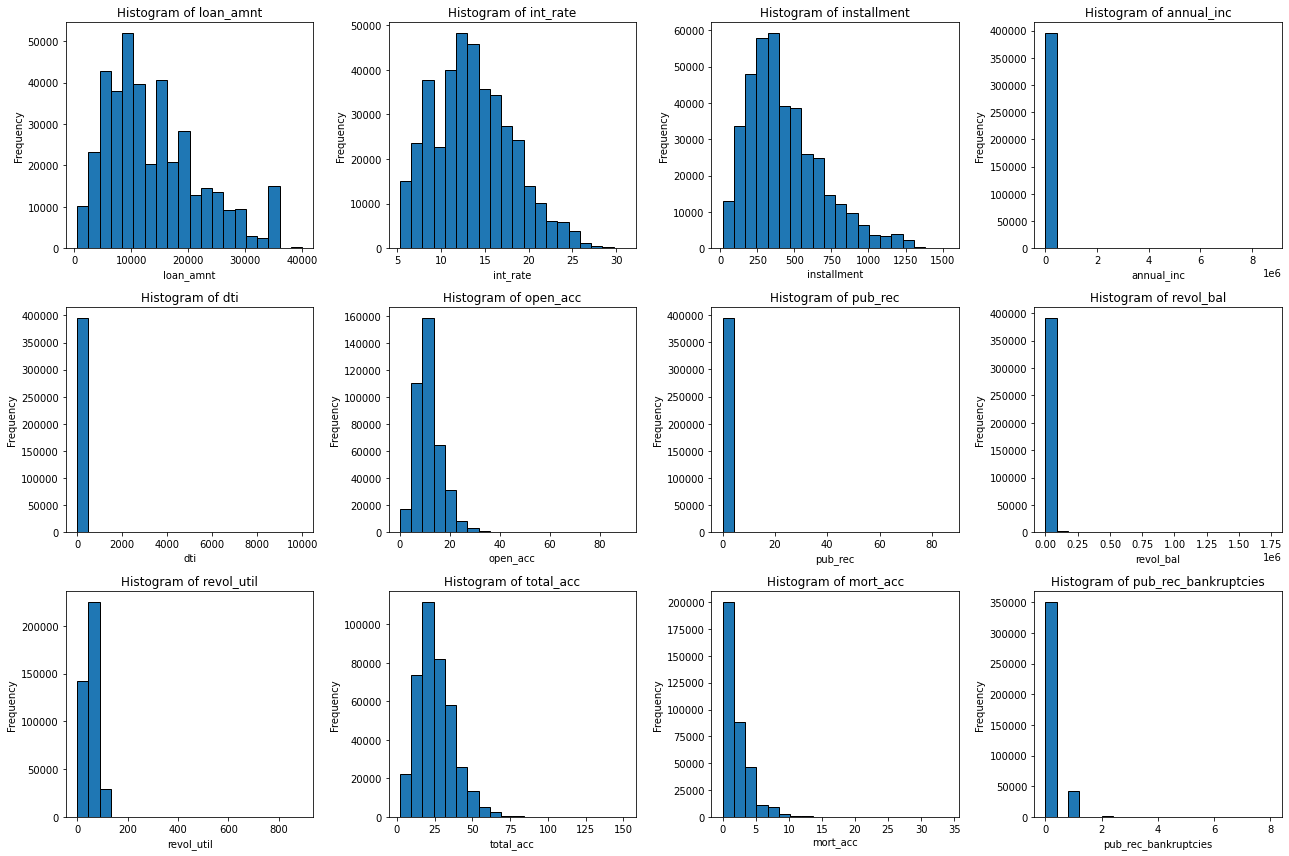

In [46]:
# Create subplots for histograms
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot histograms for each numerical variable
for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\prksh\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='annual_inc', ylabel='Density'>

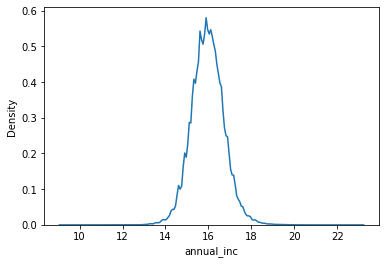

In [5]:
sns.kdeplot(np.log2(df['annual_inc']))